###### Attribute Information:
    ● Id - row id
    ● Amount_of _water - Amount of water available in the waterpump
    ● Gps_height - Altitude of the well
    ● Waterpoint_type - The kind of waterpoint
    ● Basin_name - Geographic water basin
    ● Village - Geographic location
    ● Regionname - Geographic location
    ● Region_code- Geographic location (coded)
    ● Wardname- Geographic location(renamed the original location)
    ● District_code - Geographic location (coded)
    ● Population – No of people around the well
    ● Public_meeting – Is there any public meetings were conducted. (If Yes TRUE otherwise False)
    ● Organization_funding - organization that provides money for that well construction
    ● Organization_surveyed– organization which has done survey to collect the data.
    ● Scheme_management - Organization operating the water point
    ● Schemename – scheme name under which water point sanctioned.
    ● Permit - Is the waterpoint has the permission to use
    ● Company_installed - Organization that installed the pump
    ● Management - How the waterpoint is managed
    ● Management_group – Group which manages the water point.
    ● Extraction_type – Way of extracting the water
    ● Extraction_type_group - Way of extracting the water
    ● Extraction_type_class – class of equipment used to extract the water
    ● Payment - What the water costs type of payment
    ● Payment_type - What the water costs type of payment
    ● Water_quality - The quality of the water
    ● Quality_group - The quality of the water
    ● Quantity - The quantity of water
    ● Quantity_group - The quantity of water
    ● Source - The source of the water
    ● Source_type - The source of the water
    ● Source_class - The source of the water
    ● Waterpoint_type_group - The kind of waterpoint.
    ● Status- Target variable (1/0 - functional/non-functional)

#### Importing Libraries

In [37]:
# Further more libraries are imported as and when required

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Directory Management

In [38]:
import os
os.getcwd()    # Checking address of the current directory

'C:\\Users\\Bunty\\Desktop\\20210717_MiTH_Dataset'

### Reading the data

In [81]:
# Data is stored into the variable 'train'


train = pd.read_csv('C:\\Users\\Bunty\\Desktop\\20210717_MiTH_Dataset\\traindata_updated-1617172296397.csv')
test = pd.read_csv('C:\\Users\\Bunty\\Desktop\\20210717_MiTH_Dataset\\testdataupdated-1617172320262.csv')

### Exploratory Data Analysis & Feature Engineering

In [82]:
# Checking the shape of the train data

train.shape

(44068, 34)

In [83]:
# Checking the shape of the test data

test.shape

(11015, 33)

In [86]:
# Checking the no.of unique values of the train data

train.nunique()

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [87]:
# Checking the no.of unique values of the test data

test.nunique()

Id                       11015
Amount_of_water             67
Gps_height                2031
Waterpoint_type              6
Basin_name                   9
Village                   6726
Regionname                  21
Region_code                 26
Wardname                  1879
District_code               20
Population                 536
Public_meeting               2
Organization_funding      1216
Organization_surveyed        1
Scheme_management           11
SchemeName                1578
Permit                       2
Company_installed         1233
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [88]:
#  Checking top 5 rows of train data

train.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


In [89]:
#  Checking top 5 rows of test data

test.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,31547,0.0,1018,hand pump,basin2,village4319,region5,10,ward1777,4,...,pay when scheme fails,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump
1,34980,0.0,356,hand pump,basin8,village2412,region5,10,ward493,1,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump
2,54744,500.0,265,hand pump,basin7,village19173,region2,5,ward1546,3,...,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
3,20884,0.0,1203,communal standpipe multiple,basin5,village1692,region18,20,ward643,6,...,unknown,unknown,soft,good,enough,enough,lake,river/lake,surface,communal standpipe
4,42440,0.0,0,communal standpipe,basin2,village17574,region19,12,ward1356,3,...,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe


In [90]:
# Checking for missing values in train data
#However further null values are detected later and imputed accordingly

train.isnull().sum()

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                   0
Management_group             0
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                      0
Payment_type                 0
Water_quality                0
Quality_group                0
Quantity                     0
Quantity_group               0
Source                       0
Source_type                  0
Source_class                 0
Waterpoi

In [91]:
# Checking for missing values in test data
#However further null values are detected later and imputed accordingly

test.isnull().sum()

Id                          0
Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Village                     0
Regionname                  0
Region_code                 0
Wardname                    0
District_code               0
Population                  0
Public_meeting            653
Organization_funding        0
Organization_surveyed       0
Scheme_management         724
SchemeName               5211
Permit                    529
Company_installed           0
Management                  0
Management_group            0
Extraction_type             0
Extraction_type_group       0
Extraction_type_class       0
Payment                     0
Payment_type                0
Water_quality               0
Quality_group               0
Quantity                    0
Quantity_group              0
Source                      0
Source_type                 0
Source_class                0
Waterpoint_type_group       0
dtype: int

In [92]:
# Outliers are detected in many features, but outliers are also found in test data. therefore ingoring outliers

train.describe()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population,Status
count,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000
mean,37092.516384,329.781607,674.305460,15.224539,5.664382,179.780181,0.585640
std,21490.884249,3127.604462,698.062813,17.566722,9.670612,473.609701,0.492617
min,0.000000,0.000000,-63.000000,1.000000,0.000000,0.000000,0.000000
25%,18363.250000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37021.500000,0.000000,370.000000,12.000000,3.000000,25.000000,1.000000
75%,55685.250000,20.000000,1327.000000,17.000000,5.000000,211.000000,1.000000
max,74242.000000,350000.000000,2628.000000,99.000000,80.000000,30500.000000,1.000000


In [93]:
test.describe()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population
count,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000
mean,37191.448933,288.939537,660.207263,15.529460,5.832410,182.313572
std,21347.415727,2804.815011,689.647957,18.129926,10.026108,477.392955
min,2.000000,0.000000,-90.000000,1.000000,0.000000,0.000000
25%,19039.000000,0.000000,0.000000,5.000000,2.000000,0.000000
50%,37120.000000,0.000000,361.000000,12.000000,3.000000,25.000000
75%,55503.500000,20.000000,1317.000000,17.000000,5.000000,209.500000
max,74247.000000,200000.000000,2569.000000,99.000000,80.000000,11463.000000


In [94]:
# Checking for names of columns in the dataset

train.columns

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group', 'Status'],
      dtype='object')

In [ ]:
# Checking for missing values in train data
#However further null values are detected later and imputed accordingly

train.isnull().sum()

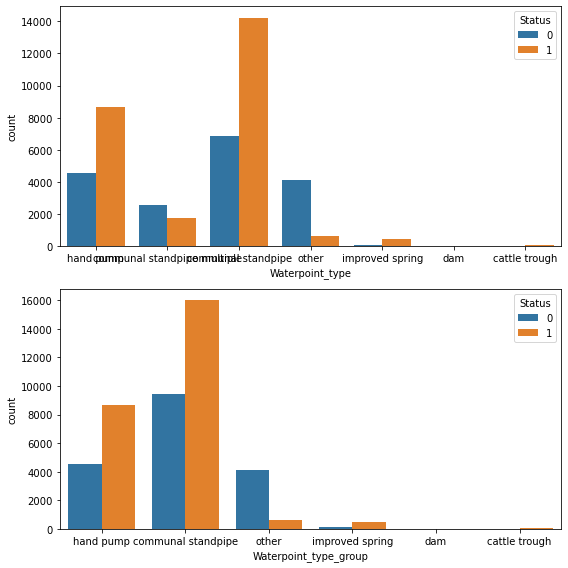

In [40]:
# Waterpoint_type_group can be dropped -->
# 'Waterpoint_type' gives identical information, hence dropping it

plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(2,1)

sns.countplot('Waterpoint_type',data=train,hue='Status',ax=ax[0])
sns.countplot('Waterpoint_type_group',data=train,hue='Status',ax=ax[1])
fig.show()

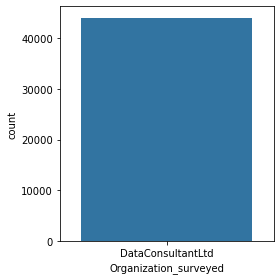

In [41]:
# Organization_surveyed --> has only one value trhoughout --> hence can be dropped

plt.rcParams["figure.figsize"] = [4,4]
sns.countplot('Organization_surveyed',data=train)
fig.show()

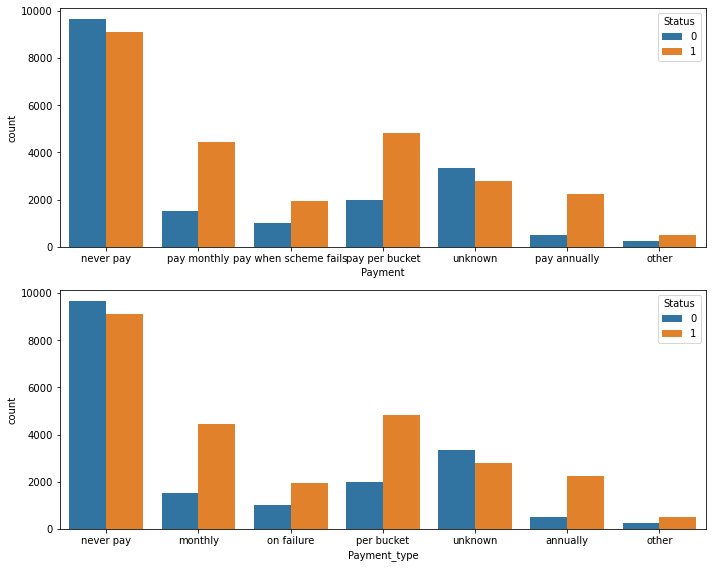

In [42]:
# Payment and Payment_type --> are giving almost identical information --> hence dropping Payment_type

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(2,1)

sns.countplot('Payment',data=train,hue='Status',ax=ax[0])
sns.countplot('Payment_type',data=train,hue='Status',ax=ax[1])
fig.show()

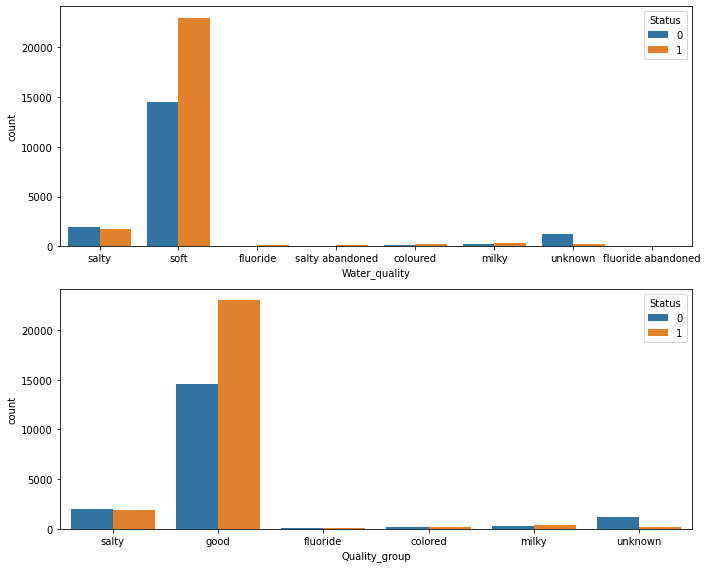

In [43]:
# Quality_group can be dropped because -->
# 'Quality_group' and 'Water_quality' gives almost same information, but 'Water_quality' gives more details

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(2,1)

sns.countplot('Water_quality',data=train,hue='Status',ax=ax[0])
sns.countplot('Quality_group',data=train,hue='Status',ax=ax[1])
fig.show()

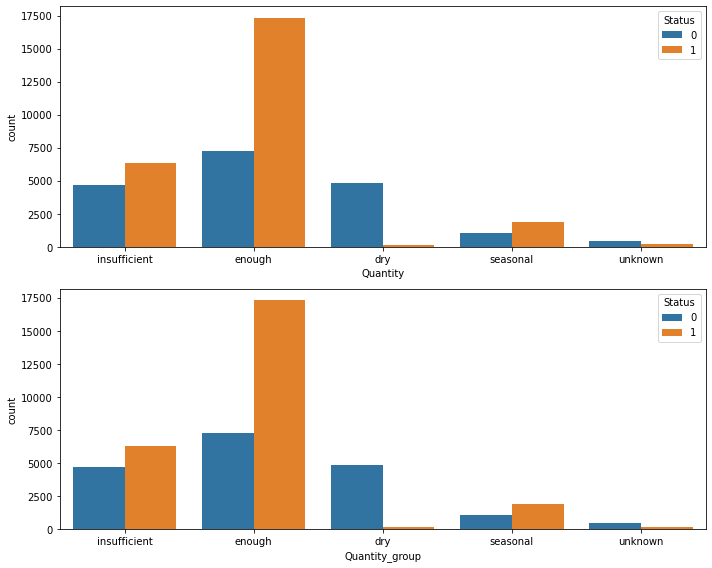

In [44]:
# Quantity_group can be dropped because -->
# 'Quantity_group' and 'Quantity' gives identical information, so either one can be dropped

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(2,1)

sns.countplot('Quantity',data=train,hue='Status',ax=ax[0])
sns.countplot('Quantity_group',data=train,hue='Status',ax=ax[1])
fig.show()

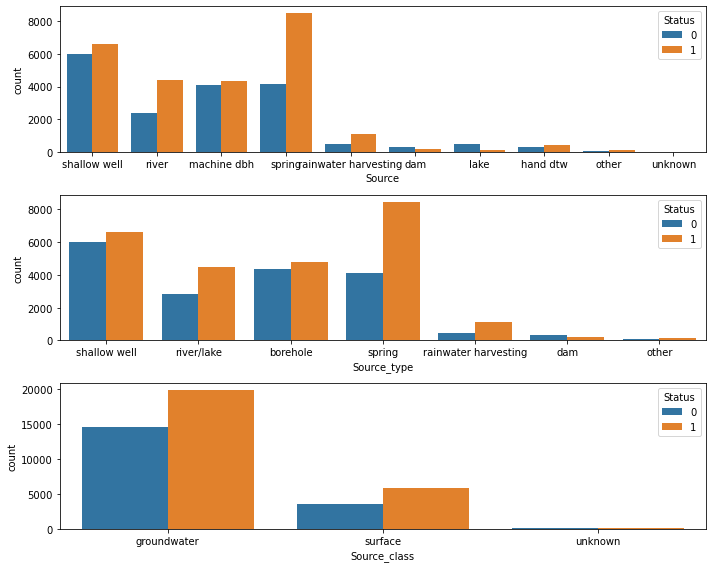

In [45]:
# From the below graph and Excel sheet, it can be observed that -->
# Source & Source_class can be dropped because -->
# 'Source_type' also gives same information, but here all the null values are already classified as 'other'

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(3,1)

sns.countplot('Source',data=train,hue='Status',ax=ax[0])
sns.countplot('Source_type',data=train,hue='Status',ax=ax[1])
sns.countplot('Source_class',data=train,hue='Status',ax=ax[2])
fig.show()

<AxesSubplot:xlabel='Amount_of_water', ylabel='count'>

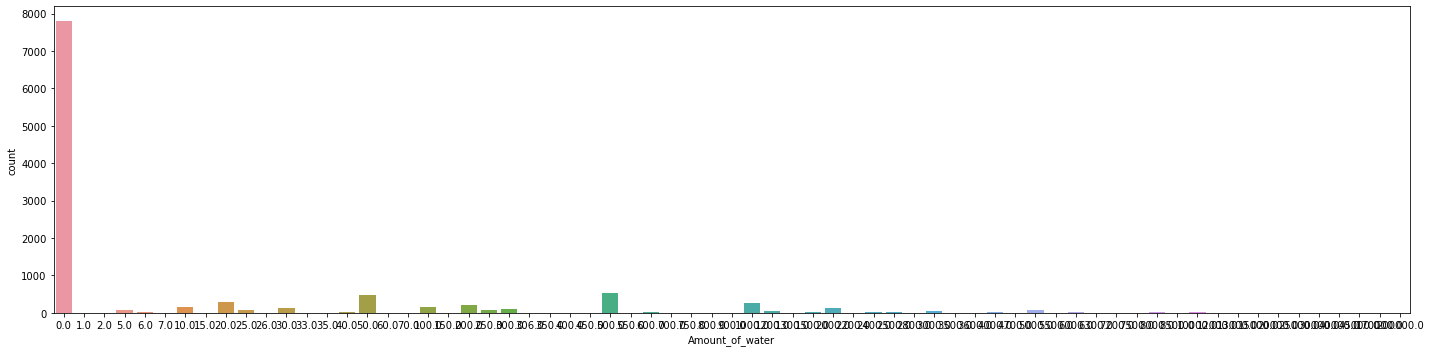

In [96]:
# From the below graph, it can be seen that majority of the values in Amount_of_water is '0'
# But, for some rows with 0 --> pump is shown as working --> which is not possible.
# Therefore, I have considered 0 as NaN and further imputed it with median, when grouped_by Region or Basin

plt.rcParams["figure.figsize"] = [20, 5]
sns.countplot(test.Amount_of_water)

<AxesSubplot:xlabel='Gps_height', ylabel='Amount_of_water'>

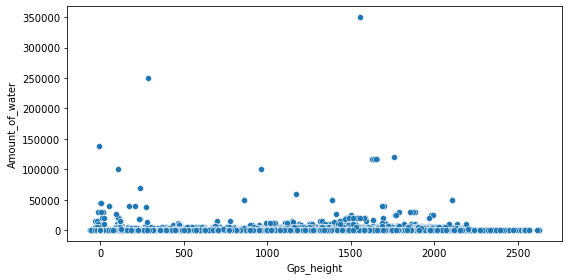

In [74]:
# Generally, Amount_of_water should decrease with increasing altitude -->
# However, it is not so, in the dataset --> it is contradictory to the general idea

plt.rcParams["figure.figsize"] = [8, 4]
sns.scatterplot('Gps_height',data=train, y='Amount_of_water')

In [55]:
# The negative values in Gps_height could be because of the regions lying below sea level

np.sort(train.Gps_height.unique())

array([ -63,  -59,  -57, ..., 2626, 2627, 2628], dtype=int64)

<AxesSubplot:ylabel='null'>

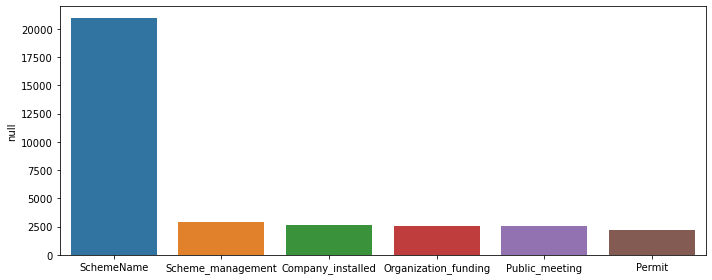

In [97]:
# SchemeName can be dropped because --> it has around 47.5% Null Values

plt.rcParams["figure.figsize"] = [10, 4]

null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False),columns=['null']).head(6)
sns.barplot(x=null.index,y=null['null'])

Text(0.5, 0, 'totalCount')

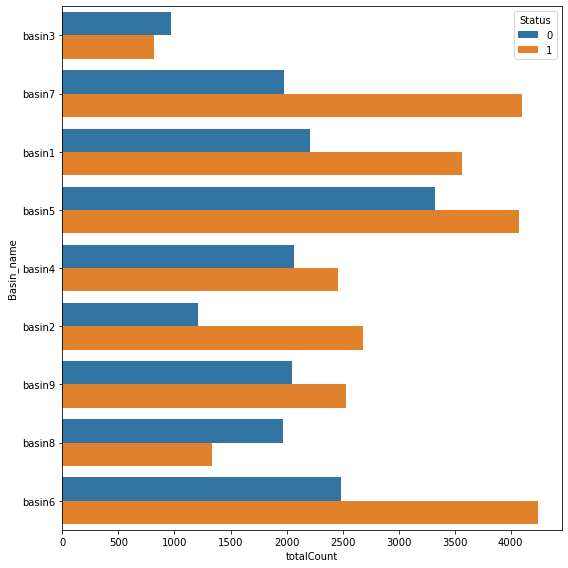

In [57]:
# Target distribution grouped on Basin_name can be observed from the below graph

ax = sns.countplot(y='Basin_name', data=train,hue='Status')
ax.set_xlabel('totalCount')

### By observing in MS Excel and Above graphs --> following features can be dropped

###### Id
    - Since it has all unique values and does not have any bearing on Target Variable
    
###### Region_code
    - Since it gives almost same information as 'Regionname'

###### Organization_surveyed
    - Since it has only a single value (Zero Variance)
    
###### Scheme_management
    - Since it gives almost same information as 'Management'
    
###### SchemeName
    - Since it has 47.5% Null Values
    
###### Management
    - Since 'Management_group' provide same information, but 'Management_group' provides more succinctly.
    
###### Extraction_type & Extraction_type_group
    - Extraction_type & Extraction_type_group are the sub-groups of 'Extraction_type_class'
    - all three features provide same information, but 'Extraction_type_class' provides more succinctly.
    
###### Payment_type
    - 'Payment' and 'Payment_type' gives identical information, so either one can be dropped
    
###### Quality_group
    - 'Quality_group' and 'Water_quality' gives almost same information, but 'Water_quality' gives more details
    
###### Quantity_group
    - 'Quantity_group' and 'Quantity' gives identical information, so either one can be dropped
    
###### Source & Source_class
    - 'Source_type' also gives same information, but here all the null values are already classified as 'other'
    
###### Waterpoint_type_group
    - 'Waterpoint_type' gives identical information, hence dropping it

In [100]:
# The columns to be dropped are stored in 'drop_columns' as a list

drop_columns = ['Id', 'Village', 'Region_code', 'Wardname',
       'Organization_surveyed', 'Scheme_management', 'SchemeName','Management',
       'Extraction_type', 'Extraction_type_group', 'Payment_type', 'Quality_group',
       'Quantity_group', 'Source', 'Source_class', 'Waterpoint_type_group']

In [101]:
# Mentioned columns are dropped from both train and test data

train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis = 1)

In [102]:
train.shape

(44068, 18)

In [103]:
test.shape

(11015, 17)

In [104]:
# Data Types of features are observed below

train.dtypes

Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Regionname                object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Permit                    object
Company_installed         object
Management_group          object
Extraction_type_class     object
Payment                   object
Water_quality             object
Quantity                  object
Source_type               object
Status                     int64
dtype: object

In [105]:
# the column names of categorical variables are stored in 'cat_attr' as a list

cat_attr  = train.select_dtypes(exclude='number').columns.tolist()
cat_attr

['Waterpoint_type',
 'Basin_name',
 'Regionname',
 'Public_meeting',
 'Organization_funding',
 'Permit',
 'Company_installed',
 'Management_group',
 'Extraction_type_class',
 'Payment',
 'Water_quality',
 'Quantity',
 'Source_type']

#### Some of the Hidden NA values are identified below

In [107]:
# All the expected NA's in the Excel are stored in 'nan_list' - as a list

nan_list = ['unknown','none','-', '0']

In [108]:
# NAs are found in the train data

train[cat_attr] = train[cat_attr].replace(nan_list, np.nan)

In [109]:
# NAs are found in the test data

test[cat_attr] = test[cat_attr].replace(nan_list, np.nan)

In [110]:
# Count of Null values are found newly are seen below

train.isnull().sum()

Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population                  0
Public_meeting           2525
Organization_funding     3224
Permit                   2227
Company_installed        3228
Management_group          421
Extraction_type_class       0
Payment                  6124
Water_quality            1445
Quantity                  603
Source_type                 0
Status                      0
dtype: int64

In [23]:
test.isnull().sum()

Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population                  0
Public_meeting            653
Organization_funding        0
Permit                    529
Company_installed           0
Management_group          113
Extraction_type_class       0
Payment                  1601
Water_quality             396
Quantity                  172
Source_type                 0
dtype: int64

<AxesSubplot:ylabel='null'>

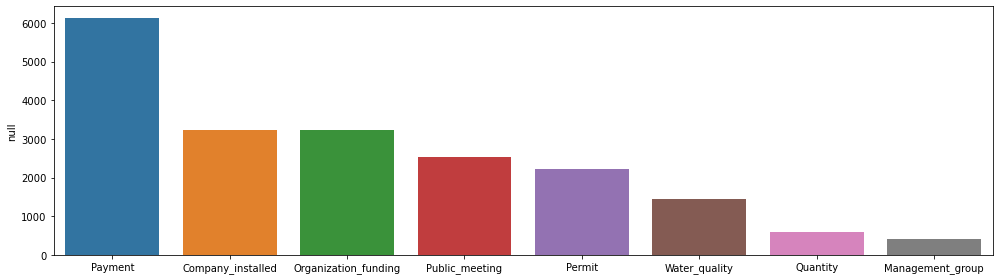

In [111]:
# Highest Null values are present in Payment --> 6000
#  All these NAs can be imputed with 'Other' as a new category --> beacuse Central Imputation doesn't make sense here

plt.rcParams["figure.figsize"] = [14, 4]

null=pd.DataFrame(train.isnull().sum().sort_values(ascending=False),columns=['null']).head(8)
sns.barplot(x=null.index,y=null['null'])

### In 'Amount_of_water' and 'Population' Columns --> '0's cannot be present  --> therefore replacing them with NaN's
    - Further imputing those Nan's with 'mean' after group_by with 'Regionname'

In [112]:
# Replacing 0's in Amount_of_water and Population with NAs on train data

train.Amount_of_water = train.Amount_of_water.replace(0, np.nan)
train.Population = train.Population.replace(0, np.nan)

In [113]:
# Replacing 0's in Amount_of_water and Population with NAs on test data

test.Amount_of_water = test.Amount_of_water.replace(0, np.nan)
test.Population = test.Population.replace(0, np.nan)

In [26]:
train.isnull().sum()

Amount_of_water          30790
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Regionname                   0
District_code                0
Population               15668
Public_meeting            2525
Organization_funding      3224
Permit                    2227
Company_installed         3228
Management_group           421
Extraction_type_class        0
Payment                   6124
Water_quality             1445
Quantity                   603
Source_type                  0
Status                       0
dtype: int64

In [27]:
test.isnull().sum()

Amount_of_water          7801
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population               3938
Public_meeting            653
Organization_funding        0
Permit                    529
Company_installed           0
Management_group          113
Extraction_type_class       0
Payment                  1601
Water_quality             396
Quantity                  172
Source_type                 0
dtype: int64

In [114]:
# New NAs in Amount_of_water are imputed with median, after grouping_by with Regionname in train data

Regionname_Amount_of_water = train.groupby('Regionname')['Amount_of_water'].transform('median')
train.Amount_of_water = train.Amount_of_water.fillna(Regionname_Amount_of_water)

In [115]:
# New NAs in Amount_of_water are imputed with same value as we did for train data

test.Amount_of_water = test.Amount_of_water.fillna(Regionname_Amount_of_water)

In [116]:
# New NAs in Regionname_Population are imputed with median, after grouping_by with Regionname in train data

Regionname_Population = train.groupby('Regionname')['Population'].transform('median')
train.Population = train.Population.fillna(Regionname_Population)

In [117]:
# New NAs in Population are imputed with same value as we did for train data

test.Population = test.Population.fillna(Regionname_Population)

In [118]:
train.isnull().sum()

Amount_of_water          8854
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population               8854
Public_meeting           2525
Organization_funding     3224
Permit                   2227
Company_installed        3228
Management_group          421
Extraction_type_class       0
Payment                  6124
Water_quality            1445
Quantity                  603
Source_type                 0
Status                      0
dtype: int64

In [119]:
test.isnull().sum()

Amount_of_water          1520
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population                744
Public_meeting            653
Organization_funding        0
Permit                    529
Company_installed           0
Management_group          113
Extraction_type_class       0
Payment                  1601
Water_quality             396
Quantity                  172
Source_type                 0
dtype: int64

###### Some more NAs are leftover in Amount_of_water and Population

In [120]:
# left over NAs in Amount_of_water are imputed with median, after grouping_by with Basin_name in train data

Basin_name_Amount_of_water = train.groupby('Basin_name')['Amount_of_water'].transform('median')
train.Amount_of_water = train.Amount_of_water.fillna(Basin_name_Amount_of_water)

In [121]:
# left over NAs in Amount_of_water are imputed with same value as we did for train data

test.Amount_of_water = test.Amount_of_water.fillna(Basin_name_Amount_of_water)

In [122]:
# left over NAs in Population are imputed with median, after grouping_by with Basin_name in train data

Basin_name_Population = train.groupby('Basin_name')['Population'].transform('median')
train.Population = train.Population.fillna(Basin_name_Population)

In [123]:
# left over NAs in Population are imputed with same value as we did for train data

test.Population = test.Population.fillna(Basin_name_Population)

In [124]:
train.isnull().sum()

Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population                  0
Public_meeting           2525
Organization_funding     3224
Permit                   2227
Company_installed        3228
Management_group          421
Extraction_type_class       0
Payment                  6124
Water_quality            1445
Quantity                  603
Source_type                 0
Status                      0
dtype: int64

In [125]:
train.isnull().sum()

Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population                  0
Public_meeting           2525
Organization_funding     3224
Permit                   2227
Company_installed        3228
Management_group          421
Extraction_type_class       0
Payment                  6124
Water_quality            1445
Quantity                  603
Source_type                 0
Status                      0
dtype: int64

#### NAs in Amount_of_water and Population are Handled
     - Now we proceed to replace NAs with a new category 'Other' --> as Central Imputation is noty sensible

In [130]:
Impute = ['Waterpoint_type',
 'Basin_name',
 'Regionname',
 'Organization_funding',
 'Company_installed',
 'Management_group',
 'Extraction_type_class',
 'Payment',
 'Water_quality',
 'Quantity',
 'Source_type']

In [131]:
# Filling NAs with 'Other' in train data

train[Impute] = train[Impute].fillna('other')

In [132]:
# Filling NAs with 'Other' in test data

test[Impute] = test[Impute].fillna('other')

In [133]:
train.isnull().sum()

Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Regionname                  0
District_code               0
Population                  0
Public_meeting           2525
Organization_funding        0
Permit                   2227
Company_installed           0
Management_group            0
Extraction_type_class       0
Payment                     0
Water_quality               0
Quantity                    0
Source_type                 0
Status                      0
dtype: int64

#### Now NAs are present only in Public_meeting and Permit --> which have only 2 classes --> Yes and No
    - These are imputed with mode

In [134]:
# Mode imputation on Train data

train = train.fillna(train.mode().iloc[0])

In [135]:
# Mode Imputation on test data

test = test.fillna(train.mode().iloc[0])

#### ALL Missing values in train and test data are successfully handled

In [136]:
train.isnull().sum()

Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Regionname               0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Permit                   0
Company_installed        0
Management_group         0
Extraction_type_class    0
Payment                  0
Water_quality            0
Quantity                 0
Source_type              0
Status                   0
dtype: int64

In [137]:
test.isnull().sum()

Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Regionname               0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Permit                   0
Company_installed        0
Management_group         0
Extraction_type_class    0
Payment                  0
Water_quality            0
Quantity                 0
Source_type              0
dtype: int64

#### Type Casting categorical variables from 'Object' data type to 'Categorical'

In [139]:
# Type Casting

for i in cat_attr :
    train[i] = train[i].astype("category")

In [141]:
# Type Casting

for i in cat_attr :
    test[i] = test[i].astype("category")

##### Data types are type casted

In [54]:
train.dtypes

Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Regionname               category
District_code               int64
Population                float64
Public_meeting           category
Organization_funding     category
Permit                   category
Company_installed        category
Management_group         category
Extraction_type_class    category
Payment                  category
Water_quality            category
Quantity                 category
Source_type              category
Status                      int64
dtype: object

In [55]:
test.dtypes

Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Regionname               category
District_code               int64
Population                float64
Public_meeting           category
Organization_funding     category
Permit                   category
Company_installed        category
Management_group         category
Extraction_type_class    category
Payment                  category
Water_quality            category
Quantity                 category
Source_type              category
dtype: object

### Divide data into train and validation

In [56]:
X = train.drop('Status', axis=1)
y=train['Status']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30847, 17)
(13221, 17)
(30847,)
(13221,)


In [59]:
X_train.head()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,District_code,Population,Public_meeting,Organization_funding,Permit,Company_installed,Management_group,Extraction_type_class,Payment,Water_quality,Quantity,Source_type
40996,300.0,217,hand pump,basin7,region2,3,100.0,True,Org_480,True,Iorg417,user-group,handpump,never pay,soft,insufficient,shallow well
7636,500.0,0,other,basin5,region21,8,400.0,False,Org_1425,True,Iorg154,user-group,other,never pay,soft,enough,shallow well
1092,1000.0,1286,communal standpipe,basin7,region12,1,1.0,True,Iorg131,True,Iorg131,user-group,gravity,pay monthly,soft,enough,spring
19669,100.0,1504,hand pump,basin5,region18,2,600.0,True,Org_1460,True,Iorg1581,user-group,handpump,other,salty,enough,borehole
20323,750.0,0,hand pump,basin5,region6,1,300.0,True,Org_1755,False,Iorg1899,user-group,handpump,other,other,other,shallow well


### Handling Categorical variables
    - Target Encoder is used

#### Many of the features have lot of unique values
    -Therefore doing OneHotENcoding(or Dummification) will result in lot of new columns with 0s and 1s which will increase model complexity
    -"TargetEncoder" --> will group the rows by each value of a feature and replace it with mean of Target variable for each group

### Target Encoding has a downside --> it will give information about the target variable priorly to categorical features --> Hence it may result in overfitting --> to overcome that, we use Ensemble learning techniques or Cross Validation techniques

In [60]:
# pip install --upgrade category_encoders

In [61]:
from category_encoders import TargetEncoder
te = TargetEncoder()

In [62]:
# Target Encoding on Train data

X_train[cat_attr]=te.fit_transform(X_train[cat_attr], y_train.astype("int"))
X_test[cat_attr]=te.transform(X_test[cat_attr])

In [63]:
# Target Encoding on Test data

test[cat_attr] = te.transform(test[cat_attr])

In [64]:
X_train.head()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,District_code,Population,Public_meeting,Organization_funding,Permit,Company_installed,Management_group,Extraction_type_class,Payment,Water_quality,Quantity,Source_type
40996,300.0,217,0.651981,0.675619,0.581473,3,100.0,0.595846,0.666124,0.595696,0.749850,0.581336,0.668240,0.485003,0.611113,0.568132,0.522315
7636,500.0,0,0.134328,0.546760,0.510079,8,400.0,0.476046,0.166667,0.595696,0.285714,0.581336,0.167725,0.485003,0.611113,0.708202,0.522315
1092,1000.0,1286,0.674868,0.675619,0.798294,1,1.0,0.595846,1.000000,0.595696,0.791925,0.581336,0.663325,0.748446,0.611113,0.708202,0.669768
19669,100.0,1504,0.651981,0.546760,0.480930,2,600.0,0.595846,0.212414,0.595696,0.605166,0.581336,0.668240,0.477178,0.488210,0.708202,0.524600
20323,750.0,0,0.651981,0.546760,0.627660,1,300.0,0.595846,0.500001,0.561230,0.777778,0.581336,0.668240,0.477178,0.144737,0.288991,0.522315


In [65]:
test.head()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,District_code,Population,Public_meeting,Organization_funding,Permit,Company_installed,Management_group,Extraction_type_class,Payment,Water_quality,Quantity,Source_type
0,1000.0,1018,0.651981,0.684708,0.602528,4,200.0,0.595846,0.515152,0.595696,0.488095,0.581336,0.668240,0.661888,0.611113,0.024574,0.522315
1,600.0,356,0.651981,0.403738,0.602528,1,1.0,0.476046,0.282738,0.561230,0.547101,0.581336,0.668240,0.485003,0.611113,0.708202,0.524600
2,500.0,265,0.651981,0.675619,0.581473,3,600.0,0.595846,1.000000,0.595696,0.585632,0.581336,0.668240,0.748446,0.611113,0.568132,0.522315
3,500.0,1203,0.412620,0.546760,0.480930,6,200.0,0.595846,0.127193,0.561230,0.254902,0.581336,0.564374,0.477178,0.611113,0.708202,0.615672
4,750.0,0,0.674868,0.684708,0.559966,3,300.0,0.595846,1.000000,0.595696,0.585632,0.581336,0.663325,0.748446,0.611113,0.708202,0.669768


# Model Building

### 1. Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [67]:
# fit on train data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [70]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[12521,   261],
       [  333, 17732]], dtype=int64)

In [71]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[4694,  784],
       [ 892, 6851]], dtype=int64)

In [72]:
dt_model.get_depth()

36

In [73]:
print(accuracy_score(y_true = y_train, y_pred = y_train_pred))
print(accuracy_score(y_true = y_test, y_pred = y_test_pred))

0.9807436703731319
0.8732319794266697


### 2. XGBoost Classifier

In [74]:
from xgboost import XGBClassifier

In [75]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1,use_label_encoder=False)

In [76]:
XGB_model.fit(X_train, y_train)

[16:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [77]:
y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

In [78]:
print("Train accuracy:",accuracy_score(y_train,y_pred_train))
print("Test accuracy:",accuracy_score(y_test,y_pred_test))

Train accuracy: 0.9301066554284048
Test accuracy: 0.889267075107783


#### RandomSearchCV

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# Creating the model object
dt_cv_model = XGBClassifier(class_weight="balanced")

In [97]:
param_grid = {
     'colsample_bytree': np.linspace(0.2, 0.4, 2),
     'n_estimators':[100,200],
     'max_depth': [5, 20,25]
}

In [98]:
rs_object = RandomizedSearchCV(estimator = dt_cv_model, param_distributions = param_grid,
                        verbose=45, n_jobs=-1, cv=5, n_iter=5)

In [99]:
rs_object.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[16:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:44:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           class_weight='balanced',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                    

In [100]:
# 'cv_results_' will give details of all the instances of the models that are run and their statistics
pd.DataFrame(rs_object.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,22.688154,0.413099,0.047725,0.010902,200,20,0.4,"{'n_estimators': 200, 'max_depth': 20, 'colsam...",0.892869,0.899028,0.897066,0.898525,0.892689,0.896035,0.002736,1
1,3.692180,0.094402,0.018239,0.001532,200,5,0.2,"{'n_estimators': 200, 'max_depth': 5, 'colsamp...",0.891572,0.894165,0.893824,0.893176,0.885233,0.891594,0.003303,4


In [101]:
#Out of all the models that the RandomizedSearchCV has tried, it will save the best model parameters
rs_object.best_params_

{'n_estimators': 200, 'max_depth': 20, 'colsample_bytree': 0.4}

In [102]:
rs_object.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [103]:
y_train_pred = rs_object.predict(X_train)
y_test_pred = rs_object.predict(X_test)

In [104]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[12466,   316],
       [  306, 17759]], dtype=int64)

In [105]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[4825,  653],
       [ 773, 6970]], dtype=int64)

In [107]:
print(accuracy_score(y_true = y_train, y_pred = y_train_pred))
print(accuracy_score(y_true = y_test, y_pred = y_test_pred))

0.9798359645994749
0.8921412903713789


##### Grid-Search

In [79]:
from sklearn.model_selection import GridSearchCV

In [109]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.4, 2),
     'n_estimators':[200],
     'max_depth': [20,25]
}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 3)

In [110]:
CV_XGB.fit(X = X_train, y=y_train)

[16:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
       1.05306122, 1.08571429, 1.11836735, 1.15102041, 1.18367347,
       1.21632653, 1.24897959, 1.28163265, 1.31428571, 1.34693878,
       1.37959184, 1.4122449 , 1.44489796, 1.47755102, 1.51020408,
       1.54285714, 1.5755102 , 1.60816327, 1.64081633, 1.67346939,
       1.706122

In [111]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

0.8922423603677725 {'colsample_bytree': 0.5306122448979592, 'max_depth': 20, 'n_estimators': 200}


In [112]:
best_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5306122448979592, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
y_pred_train=best_xgb_model.predict(X_train)
y_pred_test=best_xgb_model.predict(X_test)

In [114]:
print("Train accuracy:",accuracy_score(y_train,y_pred_train))
print("Test accuracy:",accuracy_score(y_test,y_pred_test))

Train accuracy: 0.9802573994229584
Test accuracy: 0.8930489372967249


In [116]:
submission = pd.read_csv('samplesubmission_updated-1617172344901.csv')
final_predictions = best_xgb_model.predict(test)
submission['Status'] = final_predictions
submission.to_csv('Vineel_Vadduri_B94_MiTH.csv', index=False)

### 3. RandomForest

In [83]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 200, criterion="entropy")  
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [84]:
y_train_pred_RF = classifier.predict(X_train)
y_test_pred_RF = classifier.predict(X_test)

In [85]:
print(accuracy_score(y_true = y_train, y_pred = y_train_pred_RF))
print(accuracy_score(y_true = y_test, y_pred = y_test_pred_RF))

0.9807436703731319
0.8944860449285228


##### GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [96]:
## Use Grid Search for parameter tuning. (Exhaustive search over specified parameter values for an estimator)

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree

rfc_grid = RandomForestClassifier(n_jobs=-1,max_features='sqrt')
 
# Use a grid over parameters of interest

param_grid = { 
           "n_estimators" : [200,300]
#            "max_depth" : [5, 10],
#            "min_samples_leaf" : [2, 4]
            }
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 3)

In [97]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_features='sqrt', n_jobs=-1),
             param_grid={'n_estimators': [200, 300]})

In [98]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.8944144063469356 {'n_estimators': 300}


In [99]:
y_pred_train = rfc_cv_grid.predict(X_train)
y_pred_test = rfc_cv_grid.predict(X_test)

In [100]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9807436703731319
Test Accuracy: 0.8958475153165418


In [102]:
submission = pd.read_csv('samplesubmission_updated-1617172344901.csv')
final_predictions = rfc_cv_grid.predict(test)
submission['Status'] = final_predictions
submission.to_csv('Vineel_Vadduri_B94_MiTH.csv', index=False)